### DLPFC data integration (multi-slices)

In [1]:
import os
from DeepST import run
import matplotlib.pyplot as plt
from pathlib import Path
import scanpy as sc
import numpy as np
from sklearn import metrics
import json
import time
import os.path as osp
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['R_HOME'] = r'C:\Program Files\R\R-4.4.2'
os.environ['R_USER'] = r'C:\Users\CLEARLOVE\.conda\envs\STG\Lib\site-packages\rpy2'

C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import annd

In [2]:
data_path = r"C:\Code\Data\DLPFC"
data_name_list = ['151673', '151674', '151675', '151676']
save_path = r"C:\Code\STG3Net-main\Baseline\deepst"
n_domains = 7

deepen = run(save_path = save_path,
	task = "Integration",
	pre_epochs = 800,
	epochs = 1000,
	use_gpu = True,
	)

###### Generate an augmented list of multiple datasets
augement_data_list = []
graph_list = []
for i in range(len(data_name_list)):
	adata = deepen._get_adata(platform="Visium", data_path=data_path, data_name=data_name_list[i])
	adata = deepen._get_image_crop(adata, data_name=data_name_list[i])
	adata = deepen._get_augment(adata, spatial_type="LinearRegress")
	graph_dict = deepen._get_graph(adata.obsm["spatial"], distType = "KDTree")
	augement_data_list.append(adata)
	graph_list.append(graph_dict)

######## Synthetic Datasets and Graphs
multiple_adata, multiple_graph = deepen._get_multiple_adata(adata_list = augement_data_list, data_name_list = data_name_list, graph_list = graph_list)

###### Enhanced data preprocessing
data = deepen._data_process(multiple_adata, pca_n_comps = 200)

deepst_embed = deepen._fit(
		data = data,
		graph_dict = multiple_graph,
		domains = multiple_adata.obs["batch"].values,  ##### Input to Domain Adversarial Model
		n_domains = len(data_name_list))
multiple_adata.obsm["DeepST_embed"] = deepst_embed

C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 31.583771808363334
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 32.08170563961485
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 32.930454290521595
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 31.965899154765374
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Code\STG3Net-main\deepst\DeepST.py:243: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)
C:\Code\STG3Net-main\deepst\DeepST.py:243: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)
C:\Code\STG3Net-main\deepst\DeepST.py:243: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)


Your task is in full swing, please wait


DeepST trains an initial model: 100%|██████████ [ time left: 00:00 ]
DeepST trains a final model:   0%|           [ time left: ? ]C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torch\nn\functional.py:3369: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(
DeepST trains a final model: |           [ time left: 00:00 ]    

Step 3: DeepST training has been Done!
Current memory usage：21.7501 GB
Total time: 2.00 minutes
Your task has been completed, thank you
Of course, you can also perform downstream analysis on the processed data


C:\Code\STG3Net-main\deepst\DeepST.py:218: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state=0, resolution=res)


Best resolution:  0.34999999999999987


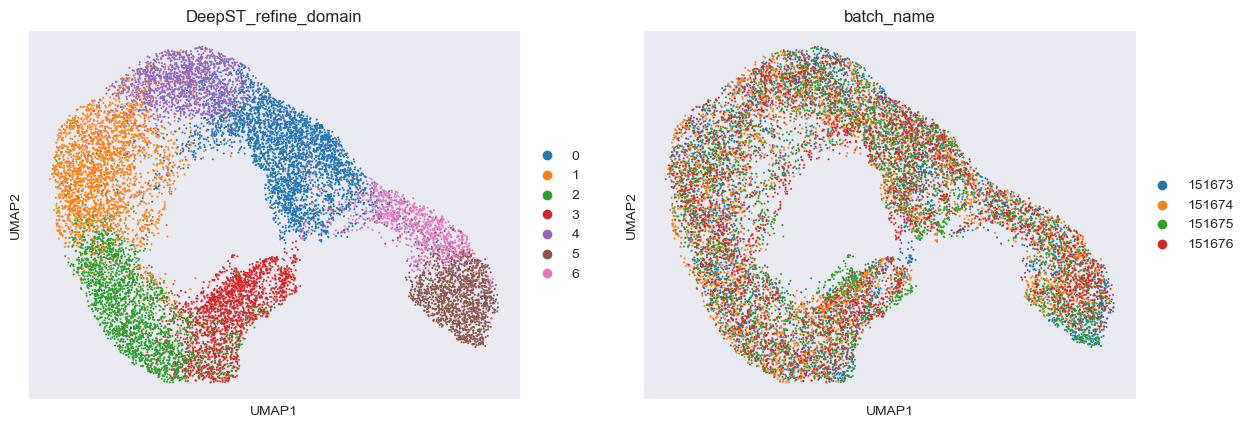

<Figure size 640x480 with 0 Axes>

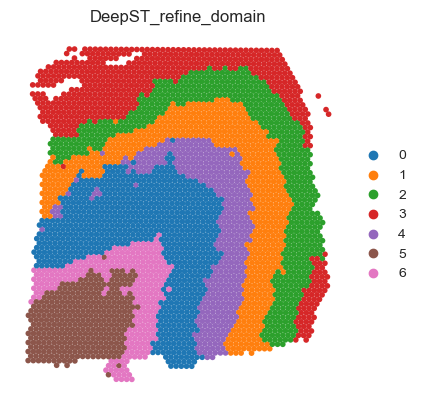

<Figure size 640x480 with 0 Axes>

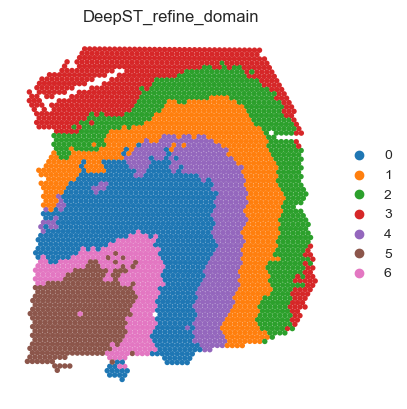

<Figure size 640x480 with 0 Axes>

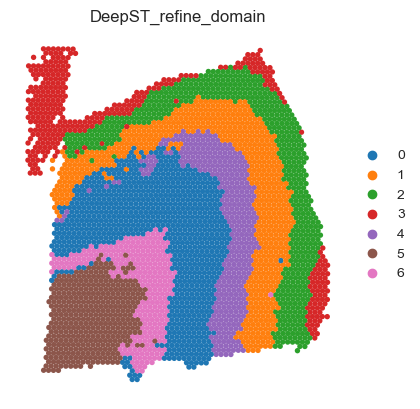

<Figure size 640x480 with 0 Axes>

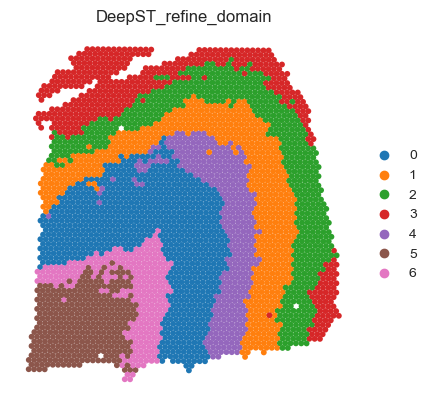

<Figure size 640x480 with 0 Axes>

In [3]:
multiple_adata = deepen._get_cluster_data(multiple_adata, n_domains=n_domains, priori = True)

sc.pp.neighbors(multiple_adata, use_rep='DeepST_embed')
sc.tl.umap(multiple_adata)
sc.pl.umap(multiple_adata, color=["DeepST_refine_domain","batch_name"])
plt.savefig(os.path.join(save_path, f'{"_".join(data_name_list)}_umap.pdf'), bbox_inches='tight', dpi=300)

for data_name in data_name_list:
	adata = multiple_adata[multiple_adata.obs["batch_name"]==data_name]
	sc.pl.spatial(adata, color='DeepST_refine_domain', frameon = False, spot_size=150)
	plt.savefig(os.path.join(save_path, f'{data_name}_domains.pdf'), bbox_inches='tight', dpi=300)

C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


整个数据集的指标:
ARI: 0.4771108113472467
NMI: 0.6362996525380081
HOM: 0.6438260970855375
COM: 0.6289471456476038
CHAOS: 0.013388065027904439
PAS: 0.09717053991434389

每个切片的指标:

切片 151673:
ARI: 0.4801873650814834
NMI: 0.6485624423915279
HOM: 0.6631510621870502
COM: 0.6346018744371364
CHAOS: 0.0609338474218999
PAS: 0.03849349210744946

切片 151674:
ARI: 0.5305890011167924
NMI: 0.6820627430475361
HOM: 0.6912391749458872
COM: 0.6731267595388619
CHAOS: 0.06019706697691723
PAS: 0.052269601100412656

切片 151675:
ARI: 0.43710151535557884
NMI: 0.6073267376928163
HOM: 0.609665507749415
COM: 0.6050058428229639
CHAOS: 0.061378392635959594
PAS: 0.051598429613011774

切片 151676:
ARI: 0.4944537185581832
NMI: 0.6602219293662328
HOM: 0.6662936651054693
COM: 0.6542598541622969
CHAOS: 0.06294004998577336
PAS: 0.05712620227338968


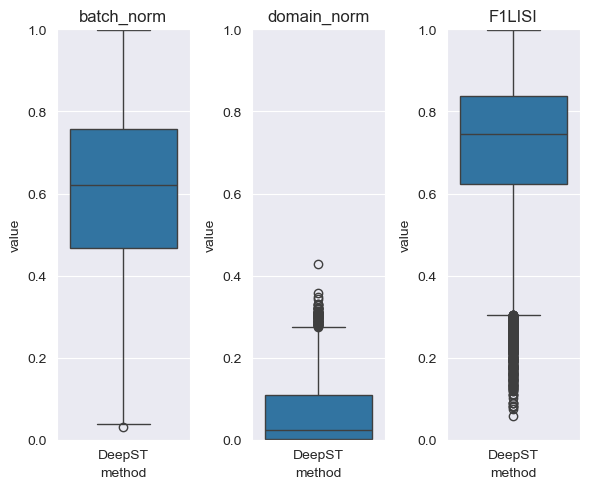

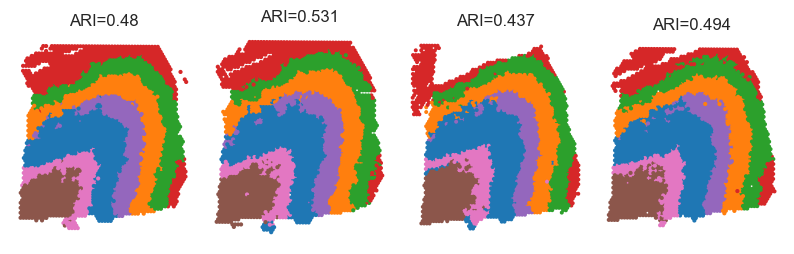

In [4]:
import pandas as pd
import harmonypy as hm
import seaborn as sns
from sklearn.metrics import adjusted_rand_score as ari_score
from STG3Net.Metrics import compute_ARI, compute_NMI, compute_HOM, compute_COM, compute_PAS, compute_CHAOS

sub_adata = multiple_adata[~pd.isnull(multiple_adata.obs['original_clusters'])]

def compute_metrics(adata, true_label_key, pred_label_key):
    ari = compute_ARI(adata, true_label_key, pred_label_key)
    nmi = compute_NMI(adata, true_label_key, pred_label_key)
    hom = compute_HOM(adata, true_label_key, pred_label_key)
    com = compute_COM(adata, true_label_key, pred_label_key)
    pas = compute_PAS(adata, pred_label_key)
    chaos = compute_CHAOS(adata, pred_label_key)

    return {
        'ARI': ari,
        'NMI': nmi,
        'HOM': hom,
        'COM': com,
        'CHAOS': chaos,
        'PAS': pas
    }

# 计算整个数据集的指标
metrics_total = compute_metrics(sub_adata, 'original_clusters', 'DeepST_refine_domain')
print("整个数据集的指标:")
for metric_name, value in metrics_total.items():
    print(f"{metric_name}: {value}")

# 计算每个切片/批次的指标
print("\n每个切片的指标:")
for name in data_name_list:
    sub_adata_tmp = sub_adata[sub_adata.obs['batch_name'] == name]
    metrics = compute_metrics(sub_adata_tmp, 'original_clusters', 'DeepST_refine_domain')
    print(f"\n切片 {name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

def compute_fscoreLISI(Tmp_adata, LT_key, BT_key, PD_key):
    num_domains = len(set(Tmp_adata.obs[PD_key])) - 1
    num_batchs = len(set(Tmp_adata.obs[BT_key])) - 1
    LISI_batch_norm = hm.compute_lisi(Tmp_adata.obsm[LT_key], Tmp_adata.obs[[BT_key]], label_colnames=[BT_key])[:, 0]
    LISI_domain_norm = hm.compute_lisi(Tmp_adata.obsm[LT_key], Tmp_adata.obs[[PD_key]], label_colnames=[PD_key])[:, 0]
    norm_batch = (LISI_batch_norm - 1)/num_batchs
    norm_domain = (LISI_domain_norm - 1)/num_domains
    LISI = 2*(1-norm_domain)*norm_batch / (1-norm_domain+norm_batch)
    return LISI , norm_batch, norm_domain

LISI , norm_batch, norm_domain = compute_fscoreLISI(sub_adata, 'DeepST_embed', 'batch_name', 'original_clusters')

df_batch_norm = pd.DataFrame({
    'method': 'DeepST',
    'value': norm_batch,
    'type': ['batch_norm'] * len(norm_batch)
})

df_domain_norm = pd.DataFrame({
    'method': 'DeepST',
    'value': norm_domain,
    'type': ['domain_norm'] * len(norm_domain)
})

df_F1LISI = pd.DataFrame({
    'method': 'DeepST',
    'value': LISI,
    'type': ['F1LISI'] * len(LISI)
})

fig, axes = plt.subplots(1, 3, figsize=(6, 5))
sns.boxplot(data=df_batch_norm, x='method', y='value', ax=axes[0])
sns.boxplot(data=df_domain_norm, x='method', y='value', ax=axes[1])
sns.boxplot(data=df_F1LISI, x='method', y='value', ax=axes[2])
axes[0].set_ylim(0, 1)
axes[1].set_ylim(0, 1)
axes[2].set_ylim(0, 1)
axes[0].set_title('batch_norm')
axes[1].set_title('domain_norm')
axes[2].set_title('F1LISI')
plt.tight_layout()

Batch_list = []
for section_id in data_name_list:
    Batch_list.append(sub_adata[sub_adata.obs['batch_name'] == section_id])

spot_size = 200
title_size = 12
ARI_list = []
for bb in range(len(data_name_list)):
    ARI_list.append(round(ari_score(Batch_list[bb].obs['original_clusters'], Batch_list[bb].obs['DeepST_refine_domain']), 3))

fig, ax = plt.subplots(1, 4, figsize=(10, 5), gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
for idx in range(len(data_name_list)):
    _sc_ = sc.pl.spatial(Batch_list[idx], img_key=None, color=['DeepST_refine_domain'], title=[''],
                      legend_loc=None, legend_fontsize=12, show=False, ax=ax[idx], frameon=False,
                      spot_size=spot_size)
    _sc_[0].set_title("ARI=" + str(ARI_list[idx]), size=title_size)
plt.show()

In [5]:
file_name = 'DeepST_Donor1.h5ad'
file_path = f'C:\Code\Answer\DLPFC\\{file_name}'

sub_adata.write(file_path)

In [10]:
data_name_list = ['151507', '151508', '151509', '151510']
save_path = r"C:\Code\STG3Net-main\Baseline\deepst"
n_domains = 7
data_path = r"C:\Code\Data\DLPFC"

deepen = run(save_path = save_path,
	task = "Integration",
	pre_epochs = 800,
	epochs = 1000,
	use_gpu = True,
	)

###### Generate an augmented list of multiple datasets
augement_data_list = []
graph_list = []
for i in range(len(data_name_list)):
	adata = deepen._get_adata(platform="Visium", data_path=data_path, data_name=data_name_list[i])
	adata = deepen._get_image_crop(adata, data_name=data_name_list[i])
	adata = deepen._get_augment(adata, spatial_type="LinearRegress")
	graph_dict = deepen._get_graph(adata.obsm["spatial"], distType = "KDTree")
	augement_data_list.append(adata)
	graph_list.append(graph_dict)

######## Synthetic Datasets and Graphs
multiple_adata, multiple_graph = deepen._get_multiple_adata(adata_list = augement_data_list, data_name_list = data_name_list, graph_list = graph_list)

###### Enhanced data preprocessing
data = deepen._data_process(multiple_adata, pca_n_comps = 200)

deepst_embed = deepen._fit(
		data = data,
		graph_dict = multiple_graph,
		domains = multiple_adata.obs["batch"].values,  ##### Input to Domain Adversarial Model
		n_domains = len(data_name_list))
multiple_adata.obsm["DeepST_embed"] = deepst_embed

C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 33.77090736792229
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 33.88929468157955
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 33.32539682539682
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 32.85070729053319
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Code\STG3Net-main\deepst\DeepST.py:235: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)
C:\Code\STG3Net-main\deepst\DeepST.py:235: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)
C:\Code\STG3Net-main\deepst\DeepST.py:235: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)


Your task is in full swing, please wait


DeepST trains an initial model: 100%|██████████ [ time left: 00:00 ]
DeepST trains a final model:   0%|           [ time left: ? ]C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torch\nn\functional.py:3369: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(
DeepST trains a final model: |           [ time left: 00:00 ]    


Step 3: DeepST training has been Done!
Current memory usage：2.4133 GB
Total time: 2.49 minutes
Your task has been completed, thank you
Of course, you can also perform downstream analysis on the processed data


Best resolution:  0.48999999999999977


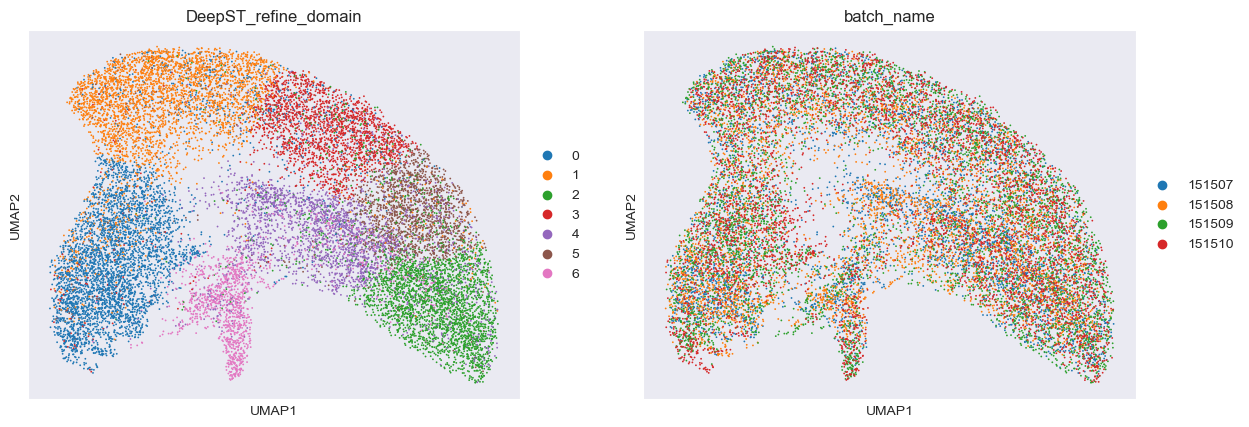

<Figure size 640x480 with 0 Axes>

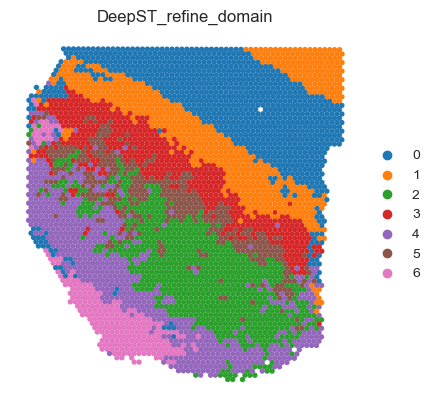

<Figure size 640x480 with 0 Axes>

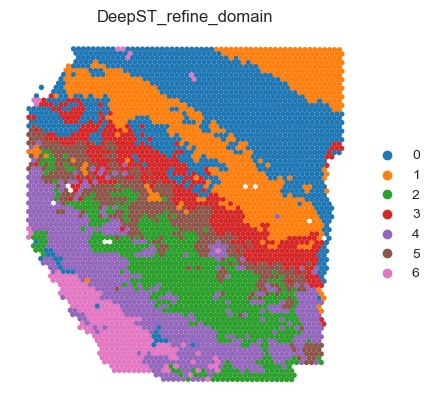

<Figure size 640x480 with 0 Axes>

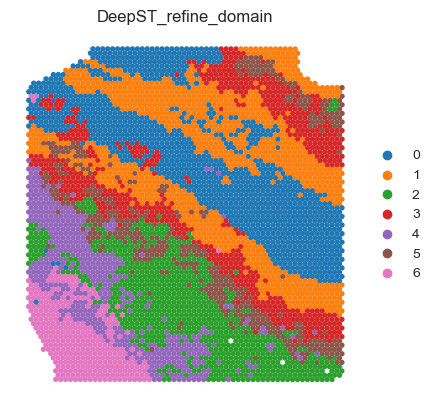

<Figure size 640x480 with 0 Axes>

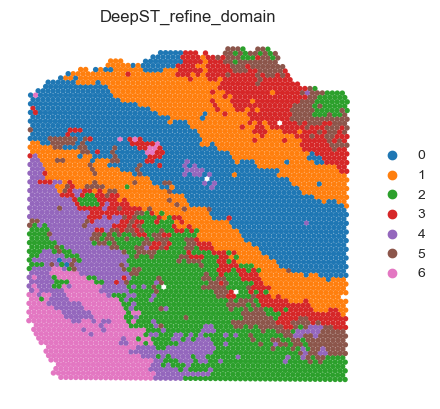

<Figure size 640x480 with 0 Axes>

In [11]:
multiple_adata = deepen._get_cluster_data(multiple_adata, n_domains=n_domains, priori = True)

sc.pp.neighbors(multiple_adata, use_rep='DeepST_embed')
sc.tl.umap(multiple_adata)
sc.pl.umap(multiple_adata, color=["DeepST_refine_domain","batch_name"])
plt.savefig(os.path.join(save_path, f'{"_".join(data_name_list)}_umap.pdf'), bbox_inches='tight', dpi=300)

for data_name in data_name_list:
	adata = multiple_adata[multiple_adata.obs["batch_name"]==data_name]
	sc.pl.spatial(adata, color='DeepST_refine_domain', frameon = False, spot_size=150)
	plt.savefig(os.path.join(save_path, f'{data_name}_domains.pdf'), bbox_inches='tight', dpi=300)

整个数据集的指标:
ARI: 0.3137519066279698
NMI: 0.42515390087010985
HOM: 0.4420542333744554
COM: 0.40949822855651996
CHAOS: 0.02519277942295616
PAS: 0.5177648040033361

每个切片的指标:

切片 151507:
ARI: 0.41590898750017896
NMI: 0.5290622605955333
HOM: 0.5353110074456823
COM: 0.5229577151447222
CHAOS: 0.05847294150939201
PAS: 0.17057569296375266

切片 151508:
ARI: 0.3316896205261555
NMI: 0.4724505203302694
HOM: 0.48435856723950793
COM: 0.4611139468071093
CHAOS: 0.05765499507621702
PAS: 0.16959598265236248

切片 151509:
ARI: 0.26983991379210803
NMI: 0.43261298281754834
HOM: 0.46497538893642465
COM: 0.4044623029749211
CHAOS: 0.05539315029365788
PAS: 0.16186299081035924

切片 151510:
ARI: 0.3673563466672827
NMI: 0.48238657353580616
HOM: 0.5211437073212966
COM: 0.44899508776862224
CHAOS: 0.05776109830926392
PAS: 0.1601741022850925


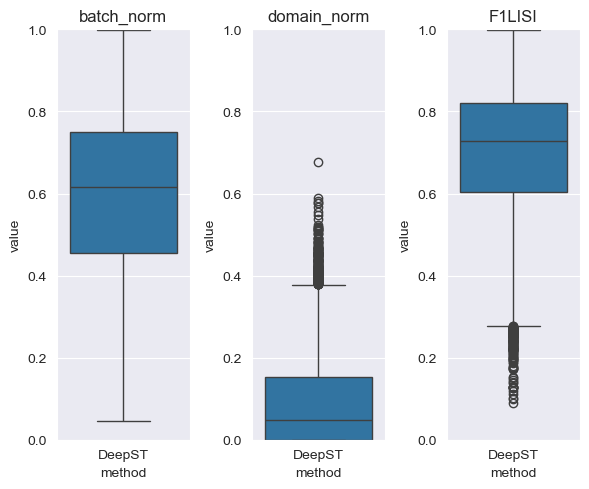

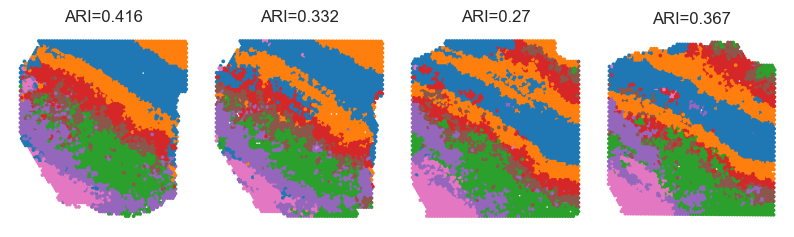

In [12]:
import pandas as pd
import harmonypy as hm
import seaborn as sns
from sklearn.metrics import adjusted_rand_score as ari_score
from STG3Net.Metrics import compute_ARI, compute_NMI, compute_HOM, compute_COM, compute_PAS, compute_CHAOS

sub_adata = multiple_adata[~pd.isnull(multiple_adata.obs['original_clusters'])]

def compute_metrics(adata, true_label_key, pred_label_key):
    ari = compute_ARI(adata, true_label_key, pred_label_key)
    nmi = compute_NMI(adata, true_label_key, pred_label_key)
    hom = compute_HOM(adata, true_label_key, pred_label_key)
    com = compute_COM(adata, true_label_key, pred_label_key)
    pas = compute_PAS(adata, pred_label_key)
    chaos = compute_CHAOS(adata, pred_label_key)

    return {
        'ARI': ari,
        'NMI': nmi,
        'HOM': hom,
        'COM': com,
        'CHAOS': chaos,
        'PAS': pas
    }

# 计算整个数据集的指标
metrics_total = compute_metrics(sub_adata, 'original_clusters', 'DeepST_refine_domain')
print("整个数据集的指标:")
for metric_name, value in metrics_total.items():
    print(f"{metric_name}: {value}")

# 计算每个切片/批次的指标
print("\n每个切片的指标:")
for name in data_name_list:
    sub_adata_tmp = sub_adata[sub_adata.obs['batch_name'] == name]
    metrics = compute_metrics(sub_adata_tmp, 'original_clusters', 'DeepST_refine_domain')
    print(f"\n切片 {name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

def compute_fscoreLISI(Tmp_adata, LT_key, BT_key, PD_key):
    num_domains = len(set(Tmp_adata.obs[PD_key])) - 1
    num_batchs = len(set(Tmp_adata.obs[BT_key])) - 1
    LISI_batch_norm = hm.compute_lisi(Tmp_adata.obsm[LT_key], Tmp_adata.obs[[BT_key]], label_colnames=[BT_key])[:, 0]
    LISI_domain_norm = hm.compute_lisi(Tmp_adata.obsm[LT_key], Tmp_adata.obs[[PD_key]], label_colnames=[PD_key])[:, 0]
    norm_batch = (LISI_batch_norm - 1)/num_batchs
    norm_domain = (LISI_domain_norm - 1)/num_domains
    LISI = 2*(1-norm_domain)*norm_batch / (1-norm_domain+norm_batch)
    return LISI , norm_batch, norm_domain

LISI , norm_batch, norm_domain = compute_fscoreLISI(sub_adata, 'DeepST_embed', 'batch_name', 'original_clusters')

df_batch_norm = pd.DataFrame({
    'method': 'DeepST',
    'value': norm_batch,
    'type': ['batch_norm'] * len(norm_batch)
})

df_domain_norm = pd.DataFrame({
    'method': 'DeepST',
    'value': norm_domain,
    'type': ['domain_norm'] * len(norm_domain)
})

df_F1LISI = pd.DataFrame({
    'method': 'DeepST',
    'value': LISI,
    'type': ['F1LISI'] * len(LISI)
})

fig, axes = plt.subplots(1, 3, figsize=(6, 5))
sns.boxplot(data=df_batch_norm, x='method', y='value', ax=axes[0])
sns.boxplot(data=df_domain_norm, x='method', y='value', ax=axes[1])
sns.boxplot(data=df_F1LISI, x='method', y='value', ax=axes[2])
axes[0].set_ylim(0, 1)
axes[1].set_ylim(0, 1)
axes[2].set_ylim(0, 1)
axes[0].set_title('batch_norm')
axes[1].set_title('domain_norm')
axes[2].set_title('F1LISI')
plt.tight_layout()

Batch_list = []
for section_id in data_name_list:
    Batch_list.append(sub_adata[sub_adata.obs['batch_name'] == section_id])

spot_size = 200
title_size = 12
ARI_list = []
for bb in range(len(data_name_list)):
    ARI_list.append(round(ari_score(Batch_list[bb].obs['original_clusters'], Batch_list[bb].obs['DeepST_refine_domain']), 3))

fig, ax = plt.subplots(1, 4, figsize=(10, 5), gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
for idx in range(len(data_name_list)):
    _sc_ = sc.pl.spatial(Batch_list[idx], img_key=None, color=['DeepST_refine_domain'], title=[''],
                      legend_loc=None, legend_fontsize=12, show=False, ax=ax[idx], frameon=False,
                      spot_size=spot_size)
    _sc_[0].set_title("ARI=" + str(ARI_list[idx]), size=title_size)
plt.show()

In [13]:
file_name = 'DeepST_Donor1.h5ad'
file_path = f'C:\Code\Answer\DLPFC\\{file_name}'

sub_adata.write(file_path)

C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 33.28547854785479
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 32.695177956371985
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 33.56437820669436
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50

Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 32.7690329218107
Gene correlation calculting Done!
Morphological similarity calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


C:\Code\STG3Net-main\deepst\DeepST.py:243: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)
C:\Code\STG3Net-main\deepst\DeepST.py:243: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)
C:\Code\STG3Net-main\deepst\DeepST.py:243: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)


Your task is in full swing, please wait


DeepST trains an initial model: 100%|██████████ [ time left: 00:00 ]
DeepST trains a final model:   0%|           [ time left: ? ]C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torch\nn\functional.py:3369: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(
DeepST trains a final model: |           [ time left: 00:00 ]    


Step 3: DeepST training has been Done!
Current memory usage：31.6088 GB
Total time: 1.63 minutes
Your task has been completed, thank you
Of course, you can also perform downstream analysis on the processed data
Best resolution:  0.33999999999999986


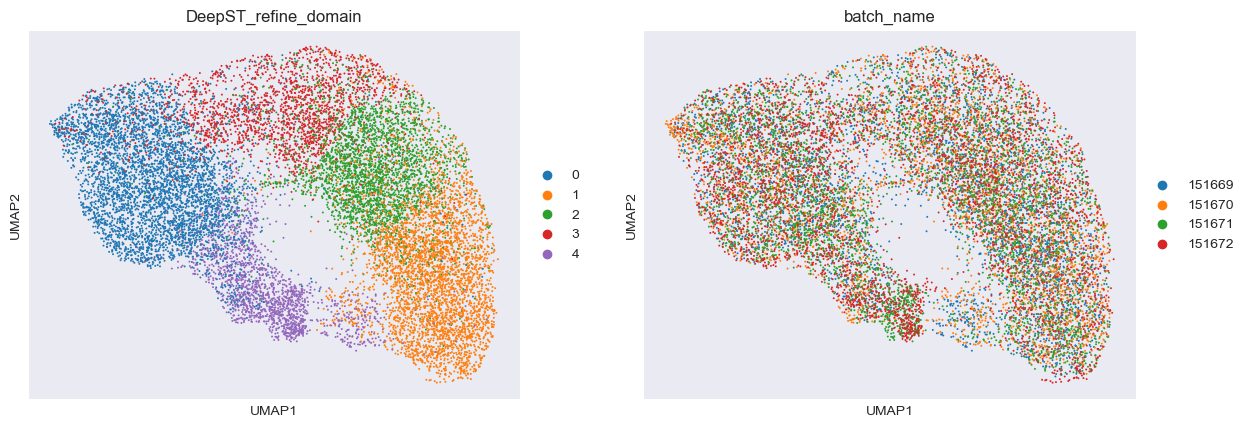

<Figure size 640x480 with 0 Axes>

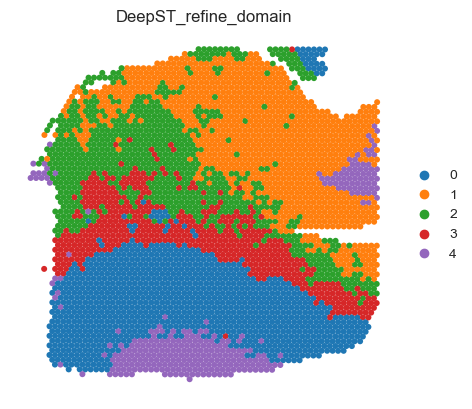

<Figure size 640x480 with 0 Axes>

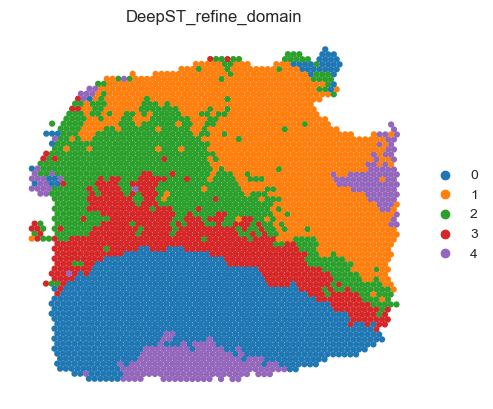

<Figure size 640x480 with 0 Axes>

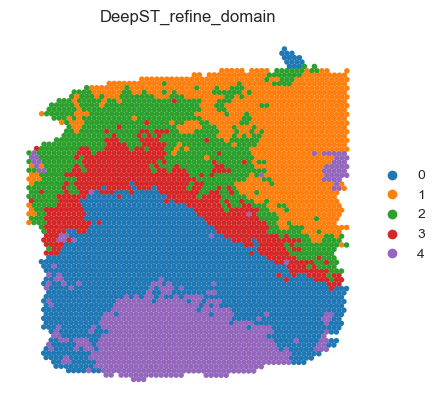

<Figure size 640x480 with 0 Axes>

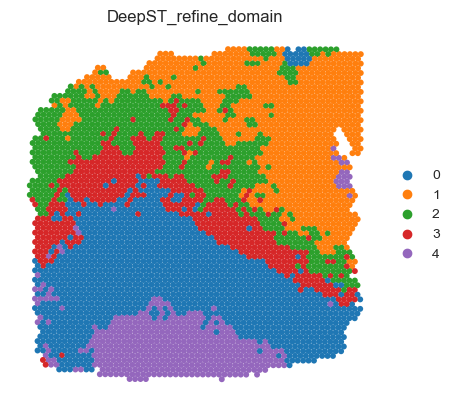

<Figure size 640x480 with 0 Axes>

In [18]:
data_name_list = ['151669','151670','151671','151672']
save_path = r"C:\Code\STG3Net-main\Baseline\deepst"
n_domains = 5

deepen = run(save_path = save_path,
	task = "Integration",
	pre_epochs = 800,
	epochs = 1000,
	use_gpu = True,
	)

###### Generate an augmented list of multiple datasets
augement_data_list = []
graph_list = []
for i in range(len(data_name_list)):
	adata = deepen._get_adata(platform="Visium", data_path=data_path, data_name=data_name_list[i])
	adata = deepen._get_image_crop(adata, data_name=data_name_list[i])
	adata = deepen._get_augment(adata, spatial_type="LinearRegress")
	graph_dict = deepen._get_graph(adata.obsm["spatial"], distType = "KDTree")
	augement_data_list.append(adata)
	graph_list.append(graph_dict)

######## Synthetic Datasets and Graphs
multiple_adata, multiple_graph = deepen._get_multiple_adata(adata_list = augement_data_list, data_name_list = data_name_list, graph_list = graph_list)

###### Enhanced data preprocessing
data = deepen._data_process(multiple_adata, pca_n_comps = 200)

deepst_embed = deepen._fit(
		data = data,
		graph_dict = multiple_graph,
		domains = multiple_adata.obs["batch"].values,  ##### Input to Domain Adversarial Model
		n_domains = len(data_name_list))
multiple_adata.obsm["DeepST_embed"] = deepst_embed
multiple_adata = deepen._get_cluster_data(multiple_adata, n_domains=n_domains, priori = True)

sc.pp.neighbors(multiple_adata, use_rep='DeepST_embed')
sc.tl.umap(multiple_adata)
sc.pl.umap(multiple_adata, color=["DeepST_refine_domain","batch_name"])
plt.savefig(os.path.join(save_path, f'{"_".join(data_name_list)}_umap.pdf'), bbox_inches='tight', dpi=300)

for data_name in data_name_list:
	adata = multiple_adata[multiple_adata.obs["batch_name"]==data_name]
	sc.pl.spatial(adata, color='DeepST_refine_domain', frameon = False, spot_size=150)
	plt.savefig(os.path.join(save_path, f'{data_name}_domains.pdf'), bbox_inches='tight', dpi=300)

整个数据集的指标:
ARI: 0.360717437983741
NMI: 0.49382800501824703
HOM: 0.5338253839289655
COM: 0.4594065301090035
CHAOS: 0.01890792532526703
PAS: 0.17621349579498047

每个切片的指标:

切片 151669:
ARI: 0.34811946842021113
NMI: 0.5148072158600625
HOM: 0.576529582125839
COM: 0.46502261337878187
CHAOS: 0.06341372565642554
PAS: 0.10616061606160616

切片 151670:
ARI: 0.3023821354291723
NMI: 0.4769430826828374
HOM: 0.5547419111296223
COM: 0.4182818601766455
CHAOS: 0.06313620642236083
PAS: 0.09357060849598163

切片 151671:
ARI: 0.3915877187169627
NMI: 0.5573246113315921
HOM: 0.5937199683083165
COM: 0.5251336339543131
CHAOS: 0.059489450121868404
PAS: 0.0933300757390667

切片 151672:
ARI: 0.4788861969101716
NMI: 0.5667453164286329
HOM: 0.5854712637316674
COM: 0.5491801196090226
CHAOS: 0.0608919534591879
PAS: 0.10365226337448559


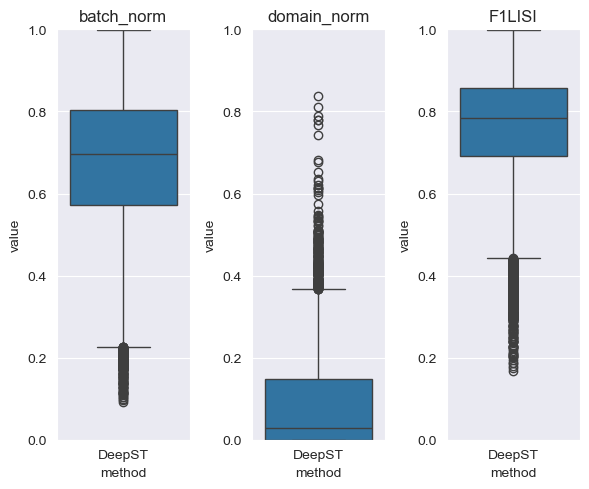

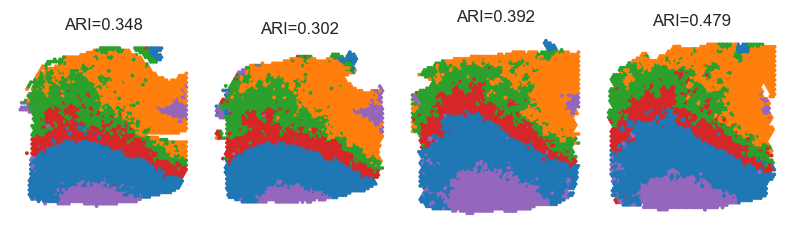

In [19]:
import pandas as pd
import harmonypy as hm
import seaborn as sns
from sklearn.metrics import adjusted_rand_score as ari_score
from STG3Net.Metrics import compute_ARI, compute_NMI, compute_HOM, compute_COM, compute_PAS, compute_CHAOS

sub_adata = multiple_adata[~pd.isnull(multiple_adata.obs['original_clusters'])]

def compute_metrics(adata, true_label_key, pred_label_key):
    ari = compute_ARI(adata, true_label_key, pred_label_key)
    nmi = compute_NMI(adata, true_label_key, pred_label_key)
    hom = compute_HOM(adata, true_label_key, pred_label_key)
    com = compute_COM(adata, true_label_key, pred_label_key)
    pas = compute_PAS(adata, pred_label_key)
    chaos = compute_CHAOS(adata, pred_label_key)

    return {
        'ARI': ari,
        'NMI': nmi,
        'HOM': hom,
        'COM': com,
        'CHAOS': chaos,
        'PAS': pas
    }

# 计算整个数据集的指标
metrics_total = compute_metrics(sub_adata, 'original_clusters', 'DeepST_refine_domain')
print("整个数据集的指标:")
for metric_name, value in metrics_total.items():
    print(f"{metric_name}: {value}")

# 计算每个切片/批次的指标
print("\n每个切片的指标:")
for name in data_name_list:
    sub_adata_tmp = sub_adata[sub_adata.obs['batch_name'] == name]
    metrics = compute_metrics(sub_adata_tmp, 'original_clusters', 'DeepST_refine_domain')
    print(f"\n切片 {name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

def compute_fscoreLISI(Tmp_adata, LT_key, BT_key, PD_key):
    num_domains = len(set(Tmp_adata.obs[PD_key])) - 1
    num_batchs = len(set(Tmp_adata.obs[BT_key])) - 1
    LISI_batch_norm = hm.compute_lisi(Tmp_adata.obsm[LT_key], Tmp_adata.obs[[BT_key]], label_colnames=[BT_key])[:, 0]
    LISI_domain_norm = hm.compute_lisi(Tmp_adata.obsm[LT_key], Tmp_adata.obs[[PD_key]], label_colnames=[PD_key])[:, 0]
    norm_batch = (LISI_batch_norm - 1)/num_batchs
    norm_domain = (LISI_domain_norm - 1)/num_domains
    LISI = 2*(1-norm_domain)*norm_batch / (1-norm_domain+norm_batch)
    return LISI , norm_batch, norm_domain

LISI , norm_batch, norm_domain = compute_fscoreLISI(sub_adata, 'DeepST_embed', 'batch_name', 'original_clusters')

df_batch_norm = pd.DataFrame({
    'method': 'DeepST',
    'value': norm_batch,
    'type': ['batch_norm'] * len(norm_batch)
})

df_domain_norm = pd.DataFrame({
    'method': 'DeepST',
    'value': norm_domain,
    'type': ['domain_norm'] * len(norm_domain)
})

df_F1LISI = pd.DataFrame({
    'method': 'DeepST',
    'value': LISI,
    'type': ['F1LISI'] * len(LISI)
})

fig, axes = plt.subplots(1, 3, figsize=(6, 5))
sns.boxplot(data=df_batch_norm, x='method', y='value', ax=axes[0])
sns.boxplot(data=df_domain_norm, x='method', y='value', ax=axes[1])
sns.boxplot(data=df_F1LISI, x='method', y='value', ax=axes[2])
axes[0].set_ylim(0, 1)
axes[1].set_ylim(0, 1)
axes[2].set_ylim(0, 1)
axes[0].set_title('batch_norm')
axes[1].set_title('domain_norm')
axes[2].set_title('F1LISI')
plt.tight_layout()

Batch_list = []
for section_id in data_name_list:
    Batch_list.append(sub_adata[sub_adata.obs['batch_name'] == section_id])

spot_size = 200
title_size = 12
ARI_list = []
for bb in range(len(data_name_list)):
    ARI_list.append(round(ari_score(Batch_list[bb].obs['original_clusters'], Batch_list[bb].obs['DeepST_refine_domain']), 3))

fig, ax = plt.subplots(1, 4, figsize=(10, 5), gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
for idx in range(len(data_name_list)):
    _sc_ = sc.pl.spatial(Batch_list[idx], img_key=None, color=['DeepST_refine_domain'], title=[''],
                      legend_loc=None, legend_fontsize=12, show=False, ax=ax[idx], frameon=False,
                      spot_size=spot_size)
    _sc_[0].set_title("ARI=" + str(ARI_list[idx]), size=title_size)
plt.show()

In [20]:
file_name = 'DeepST_Donor2.h5ad'
file_path = f'C:\Code\Answer\DLPFC\\{file_name}'

sub_adata.write(file_path)

In [10]:
data_path = r"C:\Code\Data\MERFISH"
data_name_list = ['-0.04', '-0.09', '-0.14', '-0.19', '-0.24']
save_path = r"C:\Code\STG3Net-main\Baseline\deepst"
n_domains = 8

deepen = run(save_path = save_path,
	task = "Integration",
	pre_epochs = 800,
	epochs = 1000,
	use_gpu = True,
	)

###### Generate an augmented list of multiple datasets
augement_data_list = []
graph_list = []
for i in range(len(data_name_list)):
	adata = deepen._get_adata(platform="benchmark_test", data_path=data_path, data_name=data_name_list[i])
	adata = deepen._get_image_crop(adata, data_name=data_name_list[i])
	adata = deepen._get_augment(adata, spatial_type="KDTree", use_morphological=False)
	graph_dict = deepen._get_graph(adata.obsm["spatial"], distType = "KDTree")
	augement_data_list.append(adata)
	graph_list.append(graph_dict)

✅ 当前切片与坐标共通细胞数: 5488 / 5488


Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Extract image feature: 100%|██████████ [ time left: 00:00 ]


Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 30.0
Gene correlation calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!
✅ 当前切片与坐标共通细胞数: 5557 / 5557


Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Extract image feature: 100%|██████████ [ time left: 00:00 ]


Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 30.0
Gene correlation calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!
✅ 当前切片与坐标共通细胞数: 5926 / 5926


Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Extract image feature: 100%|██████████ [ time left: 00:00 ]


Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 30.0
Gene correlation calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!
✅ 当前切片与坐标共通细胞数: 5803 / 5803


Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Extract image feature: 100%|██████████ [ time left: 00:00 ]


Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 30.0
Gene correlation calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!
✅ 当前切片与坐标共通细胞数: 5543 / 5543


Tiling image: 100%|██████████ [ time left: 00:00 ]
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Extract image feature: 100%|██████████ [ time left: 00:00 ]


Physical distance calculting Done!
The number of nearest tie neighbors in physical distance is: 30.0
Gene correlation calculting Done!
The weight result of image feature is added to adata.obsm['weights_matrix_all'] !


Find adjacent spots of each spot: 100%|██████████ [ time left: 00:00 ]


Step 1: Augment molecule expression is Done!
12.0000 neighbors per cell on average.
Step 2: Graph computing is Done!


In [11]:
######## Synthetic Datasets and Graphs
multiple_adata, multiple_graph = deepen._get_multiple_adata(adata_list = augement_data_list, data_name_list = data_name_list, graph_list = graph_list)
###### Enhanced data preprocessing
data = deepen._data_process(multiple_adata, pca_n_comps = 154)

C:\Code\STG3Net-main\deepst\DeepST.py:219: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)
C:\Code\STG3Net-main\deepst\DeepST.py:219: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)
C:\Code\STG3Net-main\deepst\DeepST.py:219: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  multiple_adata = multiple_adata.concatenate(current_adata)
C:\Code

In [12]:
deepst_embed = deepen._fit(
		data = data,
		graph_dict = multiple_graph,
		domains = multiple_adata.obs["batch"].values,  ##### Input to Domain Adversarial Model
		n_domains = len(data_name_list))
multiple_adata.obsm["DeepST_embed"] = deepst_embed

Your task is in full swing, please wait


DeepST trains an initial model: 100%|██████████ [ time left: 00:00 ]
DeepST trains a final model:   0%|           [ time left: ? ]C:\Users\CLEARLOVE\.conda\envs\STG\lib\site-packages\torch\nn\functional.py:3369: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(
DeepST trains a final model: |           [ time left: 00:00 ]    


Step 3: DeepST training has been Done!
Current memory usage：11.3123 GB
Total time: 6.06 minutes
Your task has been completed, thank you
Of course, you can also perform downstream analysis on the processed data


In [13]:
multiple_adata = deepen._get_cluster_data(multiple_adata, n_domains=n_domains, priori = True)

fitting ...
  |======================================================================| 100%


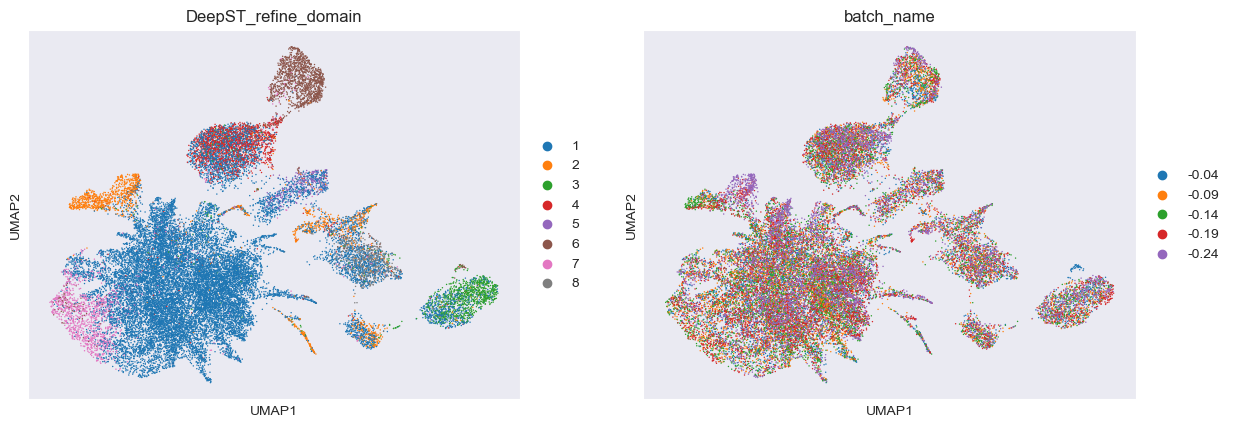

<Figure size 640x480 with 0 Axes>

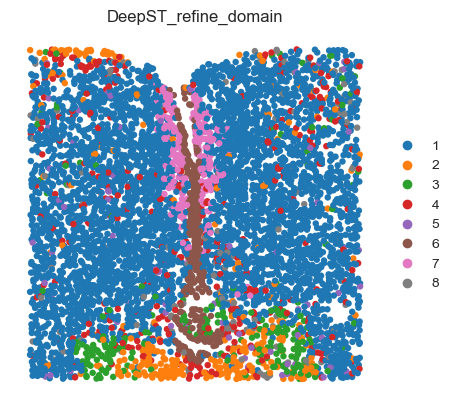

<Figure size 640x480 with 0 Axes>

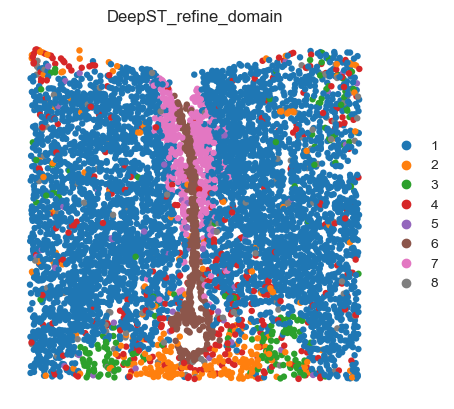

<Figure size 640x480 with 0 Axes>

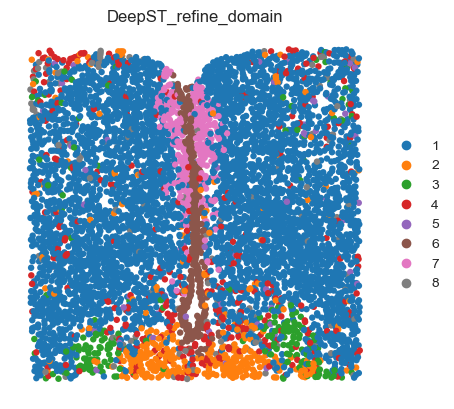

<Figure size 640x480 with 0 Axes>

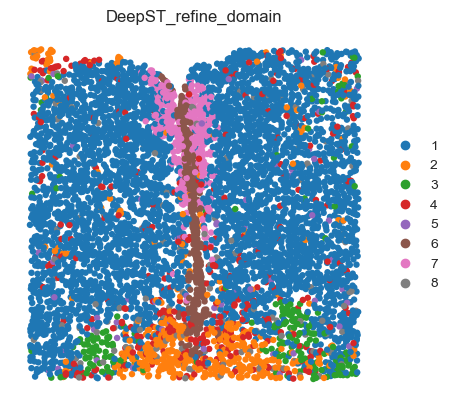

<Figure size 640x480 with 0 Axes>

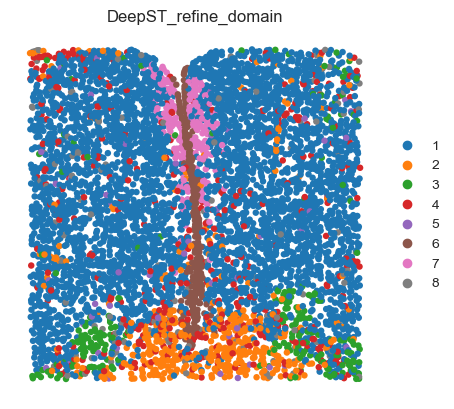

<Figure size 640x480 with 0 Axes>

In [14]:
sc.pp.neighbors(multiple_adata, use_rep='DeepST_embed')
sc.tl.umap(multiple_adata)
sc.pl.umap(multiple_adata, color=["DeepST_refine_domain","batch_name"])
plt.savefig(os.path.join(save_path, f'{"_".join(data_name_list)}_umap.pdf'), bbox_inches='tight', dpi=300)

for data_name in data_name_list:
	adata = multiple_adata[multiple_adata.obs["batch_name"]==data_name]
	sc.pl.spatial(adata, color='DeepST_refine_domain', frameon = False, spot_size=35)
	plt.savefig(os.path.join(save_path, f'{data_name}_domains.pdf'), bbox_inches='tight', dpi=300)

整个数据集的指标:
ARI: 0.14930827143378464
NMI: 0.2851496862519759
HOM: 0.22812113024724634
COM: 0.3801957449377351
CHAOS: 0.016612111669562685
PAS: 0.1832821273439983

每个切片的指标:

切片 -0.04:
ARI: 0.13835260739361
NMI: 0.2731448315718171
HOM: 0.22030091605522747
COM: 0.35934034658131836
CHAOS: 0.0425368707166432
PAS: 0.19497084548104957

切片 -0.09:
ARI: 0.15377904182483443
NMI: 0.3059724185502414
HOM: 0.24420730872795327
COM: 0.40955821255899755
CHAOS: 0.04184547964519597
PAS: 0.17707396077019974

切片 -0.14:
ARI: 0.1713966461426558
NMI: 0.3121812399292919
HOM: 0.25225990604819
COM: 0.40943846763174657
CHAOS: 0.039840063988517804
PAS: 0.17904151198110024

切片 -0.19:
ARI: 0.15902456867451897
NMI: 0.30167346329091
HOM: 0.24156594852326096
COM: 0.40160181478427454
CHAOS: 0.04000966020443974
PAS: 0.18576598311218334

切片 -0.24:
ARI: 0.16281995876566568
NMI: 0.29320360850026356
HOM: 0.23625578352316184
COM: 0.3863244488406464
CHAOS: 0.04232900028915108
PAS: 0.21053581093270793


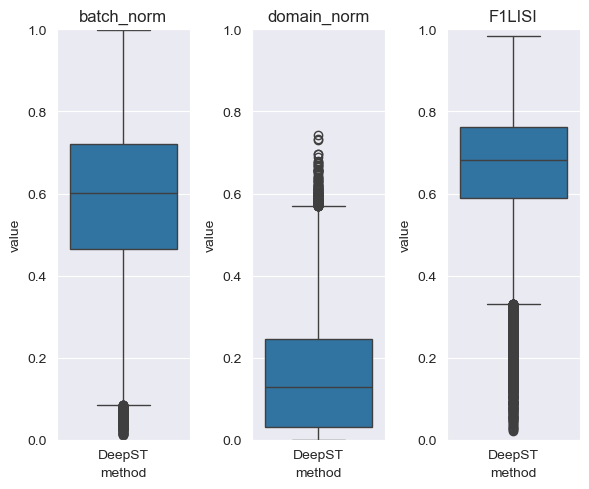

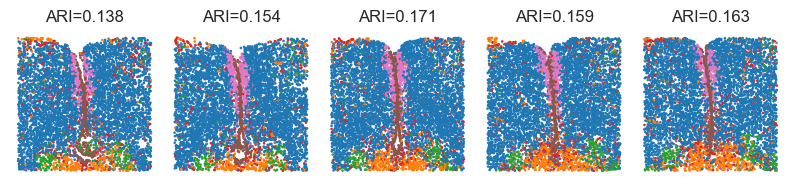

In [15]:
import pandas as pd
import harmonypy as hm
import seaborn as sns
from sklearn.metrics import adjusted_rand_score as ari_score
from STG3Net.Metrics import compute_ARI, compute_NMI, compute_HOM, compute_COM, compute_PAS, compute_CHAOS

sub_adata = multiple_adata[~pd.isnull(multiple_adata.obs['layer_guess'])]

def compute_metrics(adata, true_label_key, pred_label_key):
    ari = compute_ARI(adata, true_label_key, pred_label_key)
    nmi = compute_NMI(adata, true_label_key, pred_label_key)
    hom = compute_HOM(adata, true_label_key, pred_label_key)
    com = compute_COM(adata, true_label_key, pred_label_key)
    pas = compute_PAS(adata, pred_label_key)
    chaos = compute_CHAOS(adata, pred_label_key)

    return {
        'ARI': ari,
        'NMI': nmi,
        'HOM': hom,
        'COM': com,
        'CHAOS': chaos,
        'PAS': pas
    }

# 计算整个数据集的指标
metrics_total = compute_metrics(sub_adata, 'layer_guess', 'DeepST_refine_domain')
print("整个数据集的指标:")
for metric_name, value in metrics_total.items():
    print(f"{metric_name}: {value}")

# 计算每个切片/批次的指标
print("\n每个切片的指标:")
for name in data_name_list:
    sub_adata_tmp = sub_adata[sub_adata.obs['batch_name'] == name]
    metrics = compute_metrics(sub_adata_tmp, 'layer_guess', 'DeepST_refine_domain')
    print(f"\n切片 {name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

def compute_fscoreLISI(Tmp_adata, LT_key, BT_key, PD_key):
    num_domains = len(set(Tmp_adata.obs[PD_key])) - 1
    num_batchs = len(set(Tmp_adata.obs[BT_key])) - 1
    LISI_batch_norm = hm.compute_lisi(Tmp_adata.obsm[LT_key], Tmp_adata.obs[[BT_key]], label_colnames=[BT_key])[:, 0]
    LISI_domain_norm = hm.compute_lisi(Tmp_adata.obsm[LT_key], Tmp_adata.obs[[PD_key]], label_colnames=[PD_key])[:, 0]
    norm_batch = (LISI_batch_norm - 1)/num_batchs
    norm_domain = (LISI_domain_norm - 1)/num_domains
    LISI = 2*(1-norm_domain)*norm_batch / (1-norm_domain+norm_batch)
    return LISI , norm_batch, norm_domain

LISI , norm_batch, norm_domain = compute_fscoreLISI(sub_adata, 'DeepST_embed', 'batch_name', 'layer_guess')

df_batch_norm = pd.DataFrame({
    'method': 'DeepST',
    'value': norm_batch,
    'type': ['batch_norm'] * len(norm_batch)
})

df_domain_norm = pd.DataFrame({
    'method': 'DeepST',
    'value': norm_domain,
    'type': ['domain_norm'] * len(norm_domain)
})

df_F1LISI = pd.DataFrame({
    'method': 'DeepST',
    'value': LISI,
    'type': ['F1LISI'] * len(LISI)
})

fig, axes = plt.subplots(1, 3, figsize=(6, 5))
sns.boxplot(data=df_batch_norm, x='method', y='value', ax=axes[0])
sns.boxplot(data=df_domain_norm, x='method', y='value', ax=axes[1])
sns.boxplot(data=df_F1LISI, x='method', y='value', ax=axes[2])
axes[0].set_ylim(0, 1)
axes[1].set_ylim(0, 1)
axes[2].set_ylim(0, 1)
axes[0].set_title('batch_norm')
axes[1].set_title('domain_norm')
axes[2].set_title('F1LISI')
plt.tight_layout()

Batch_list = []
for section_id in data_name_list:
    Batch_list.append(sub_adata[sub_adata.obs['batch_name'] == section_id])

spot_size = 35
title_size = 12
ARI_list = []
for bb in range(len(data_name_list)):
    ARI_list.append(round(ari_score(Batch_list[bb].obs['layer_guess'], Batch_list[bb].obs['DeepST_refine_domain']), 3))

fig, ax = plt.subplots(1, 5, figsize=(10, 5), gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
for idx in range(len(data_name_list)):
    _sc_ = sc.pl.spatial(Batch_list[idx], img_key=None, color=['DeepST_refine_domain'], title=[''],
                      legend_loc=None, legend_fontsize=12, show=False, ax=ax[idx], frameon=False,
                      spot_size=spot_size)
    _sc_[0].set_title("ARI=" + str(ARI_list[idx]), size=title_size)
plt.show()

In [16]:
file_name = 'DeepST.h5ad'
file_path = f'C:\\Code\\Answer\\MERFISH\\{file_name}'

sub_adata.write(file_path)